# "Simulating" the sampling process

In this notebook we attempt to "simulate" the sampling process by multiplying the continuous-time signal by a pulse train. In other words, we modulate the pulse train by the continuous-time signal. As we have no way of producing a Dirac $\delta$ in the memory of a computer, we approximate it by a (more or less) narrow rectangular pulse.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import resample
from IPython.display import Audio
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')

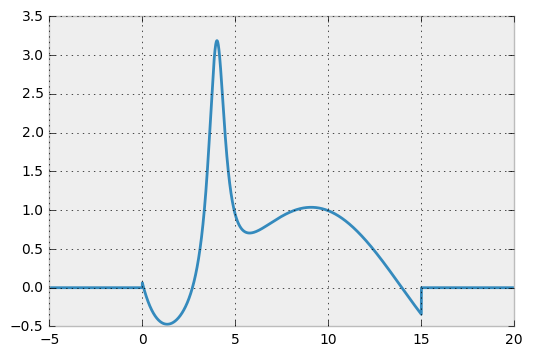

In [2]:
# Produce some signal

t_min = -5
t_max = 20
t = np.linspace(t_min, t_max, 1e4)

x = np.exp(-t) + np.sin(t/3 - 1.5) + 1 / ((t - 4)**2 + .3)

x[t > 15] = 0
x[t <= 0] = 0

plt.plot(t, x)

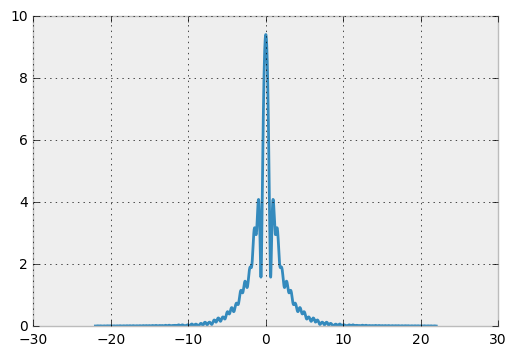

In [3]:
# Numerically compute the Fourier transform (approximate the integral)

omega_max = 7*np.pi
omega_min = -omega_max
omega = np.linspace(omega_min, omega_max, 2e3)

X = np.sum(x[:, None] * (np.exp(-1j * t[:,None] * omega[None,:])), axis=0) * (t[1] - t[0])
plt.plot(omega, np.abs(X))

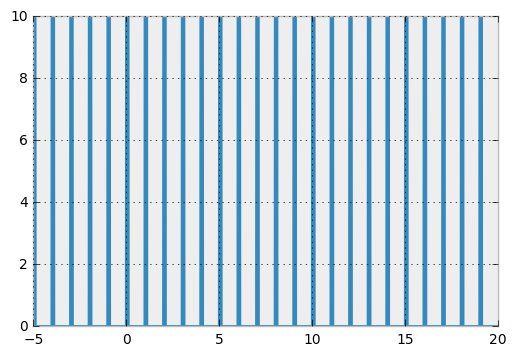

In [9]:
# Produce the comb function---a periodic train of pulses


# sampling period (time between two pulses)
T = 1

# duration of a pulse
W = 0.1

# compute the signal
comb = np.zeros(x.shape)
for k in range(-int(5/T), int(20/T)):
    # we set the amplitude to 1/W to ensure that the pulse integrates to one
    comb[(t >= k*T)*(t <= k*T + W)] = 1/W
    
plt.plot(t, comb)

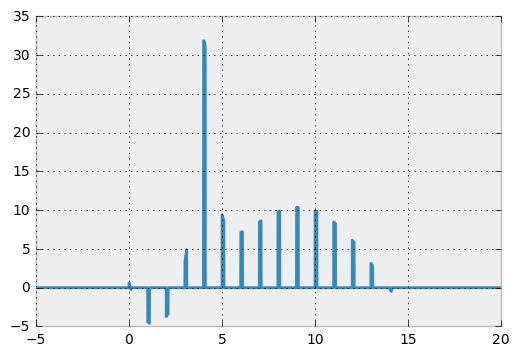

In [10]:
# Plot the modulated pulse train

plt.plot(t, x*comb)

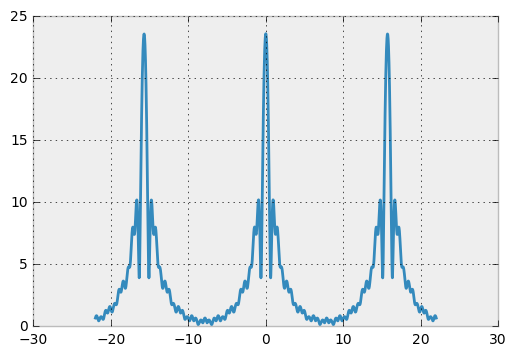

In [8]:
# Compute and plot the
omega_max = 7*np.pi
omega_min = -omega_max
omega = np.linspace(omega_min, omega_max, 2e3)

x_s = x * comb

X_s = np.sum(x_s[:, None] * (np.exp(-1j * t[:,None] * omega[None,:])), axis=0) \
    * (t[1] - t[0])

plt.plot(omega, np.abs(X_s))